Aline Freire de Rezende<br>116110571

# Python imports

In [2]:
import numpy as np
import scipy as sp
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
from matplotlib import patheffects
import matplotlib.pyplot as plt
import json
from google.colab import files


## Image upload

In [11]:
uploaded = files.upload()

for fn in uploaded.keys():
  graphicx_data = (cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2GRAY)).astype(float)
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving ipanema.png to ipanema (1).png
User uploaded file "ipanema.png" with length 143925 bytes


## JSON upload

In [12]:
uploaded = files.upload()

for fn in uploaded.keys():
  f = open(fn, )
  graphicx_mod = json.load(f)
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving ex1.json to ex1.json
User uploaded file "ex1.json" with length 48 bytes


# Code (inside test and Screen class)

In [17]:
# Função do filtro Box
def box(image, bhandler):

  if bhandler == 'icrop':
    a, b = image.shape
    filtered = np.zeros((a-2,b-2))

    for row in range(1,len(image)-1):
      for col in range(1, len(image[row])-1):
        filtered[row-1][col-1] = (image[row-1][col-1]+image[row-1][col]+image[row-1][col+1] + image[row][col-1]+image[row][col]+image[row][col+1] + image[row+1][col-1]+image[row+1][col]+image[row+1][col+1])/9


  if bhandler == 'extend':
    filtered = np.zeros(image.shape)

    # Quinas
    filtered[0][0] = (4 * image[0][0] + 2 * image[0][1] + 2 * image[1][0] + image[1][1])/9
    filtered[0][-1] = (4 * image[0][-1] + 2 * image[0][-2] + 2 * image[1][-1] + image[1][-2])/9
    filtered[-1][0] = (4 * image[-1][0] + 2 * image[-1][1] + 2 * image[-2][0] + image[-2][1])/9
    filtered[-1][-1] = (4 * image[-1][-1] + 2 * image[-1][-2] + 2 * image[-2][-1] + image[-2][-2])/9

    # Extremidade - linhas
    for col in range(1, len(image[0])-1):
      filtered[0][col] = (2 * (image[0][col-1]+image[0][col]+image[0][col+1])+ image[1][col-1]+image[1][col]+image[1][col+1])/9 #linha 0
      filtered[-1][col] = (image[-2][col-1]+image[-2][col]+image[-2][col+1] + 2 * (image[-1][col-1]+image[-1][col]+image[-1][col+1]))/9 #última linha

    # Extremidade - colunas
    for row in range(1, len(image)-1):
      filtered[row][0] = (2 * (image[row-1][0]+image[row][0]+image[row+1][0])+ image[row-1][1]+image[row][1]+image[row+1][1])/9 #coluna 0
      filtered[row][-1] = (image[row-1][-2]+image[row][-2]+image[row+1][-2] + 2 * (image[row-1][-1]+image[row][-1]+image[row+1][-1]))/9 #última coluna

    
    for row in range(1,len(image)-1):
      for col in range(1, len(image[row])-1):
        filtered[row][col] = (image[row-1][col-1]+image[row-1][col]+image[row-1][col+1] + image[row][col-1]+image[row][col]+image[row][col+1] + image[row+1][col-1]+image[row+1][col]+image[row+1][col+1])/9

  return filtered

# função do filtro Sobel


# função do filtro Laplace



In [16]:
class ImageProcesser:
  ''' 
    Apply kernel and affine xform to raster images.

    Args:
        img (np.array): grayscale image in matrix form
        gmod (dict): dictionary containing kernel and affine xform information
    '''

  def __init__(self, img, gmod):
    self._image = np.copy(img)
    self._width = img.shape[1]
    self._height = img.shape[0]
    self._kernel = gmod.get("kernel")
    self._bhandler = gmod.get("bhandler")
    self._xform = np.array(gmod.get("xform"))


  def apply_kernel(self, border):
    '''
    Method to apply kernel over image (incomplete)
    
    border: 'icrop' is for cropping image borders, 'extend' is for extending image border
    
    You may create auxiliary functions/methods if you'd like
    '''

    if self._kernel == 'box':
      self._image = box(self._image, self._bhandler)

  def apply_xform(self):
    ''' 
    Method to apply affine transform through inverse mapping (incomplete)
    You may create auxiliary functions/methods if you'd like
    '''

  def show_image(self):
    cv2_imshow(self._image)


  def update(self, show_results = True):
    ''' Method to process image and present results    
    '''

    if (self._kernel is not None):
      self.apply_kernel(self._bhandler)

    if (self._xform is not None):
      self.apply_xform()
    
    if (show_results):
      self.show_image()


# ImageProcesser (creation and execution) 

### Initialization

In [13]:
imgprocesser = ImageProcesser(graphicx_data, graphicx_mod)

### Original image

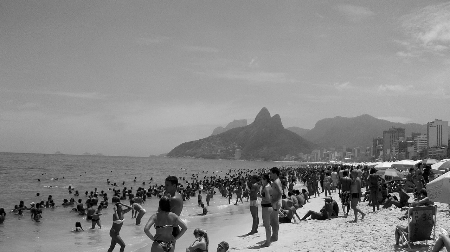

In [14]:
imgprocesser.show_image()

### Transformed image

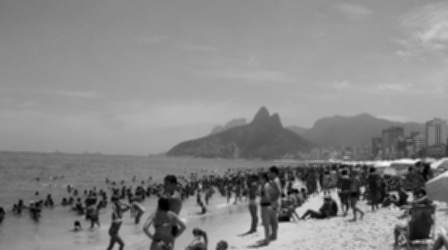

In [15]:
imgprocesser.update()